<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/jun_anl_pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`.
Вывести на экран первые 8 строк загруженного датафрейма.

In [44]:
import pandas as pd
import numpy as np

dat = pd.read_csv('/content/drive/MyDrive/SkillBox/Fishing.csv')
dat.head(8)

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [46]:
dat['log_income'] = dat['income'].apply(np.log)
dat.head()

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [47]:
dat['pdiff'] = dat.apply(lambda x: abs(x['price'] - x['pbeach']), axis=1)
dat.head()

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [48]:
dat.groupby('mode').price.agg('mean') # а как это покрасивше вывести? как датафрейм, или не надо?

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек.

In [49]:
f = lambda x: abs(x.median() - x.mean())

dat.groupby('mode').price.agg(f)

mode
beach      16.391493
boat       17.004813
charter    18.226942
pier       13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится:

In [50]:
for name, data in dat.groupby("mode"):
    print(name, data)

beach       Unnamed: 0.1  Unnamed: 0   mode    price   catch   pbeach    ppier  \
6                6           7  beach   51.934  0.0678   51.934   51.934   
14              14          15  beach   74.514  0.2537   74.514   74.514   
16              16          17  beach   48.114  0.1049   48.114   48.114   
25              25          26  beach   67.784  0.5333   67.784   67.784   
33              33          34  beach    9.522  0.0678    9.522    9.522   
...            ...         ...    ...      ...     ...      ...      ...   
1167          1167        1168  beach   23.688  0.5333   23.688   23.688   
1173          1173        1174  beach   62.634  0.0678   62.634   62.634   
1176          1176        1177  beach  121.836  0.5333  121.836  121.836   
1178          1178        1179  beach  235.436  0.5333  235.436  235.436   
1180          1180        1181  beach   36.636  0.5333   36.636   36.636   

        pboat  pcharter  cbeach   cpier   cboat  ccharter      income  \
6     19

**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [51]:
dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [52]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [53]:
for name, data in dat.groupby("mode"):
    data.to_csv(name + ".csv")

### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [54]:
dat.sort_values(['income'], inplace=True)
dat

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
771,771,772,pier,3.870,0.1498,3.870,3.870,12.900,31.400,0.2537,0.1498,0.2339,0.6288,416.66668,6.032287,0.000
890,890,891,boat,3.870,0.6817,22.446,22.446,3.870,28.870,0.2537,0.1498,0.6817,2.3014,416.66668,6.032287,18.576
828,828,829,pier,3.870,0.0014,3.870,3.870,16.770,35.270,0.2537,0.0014,0.0626,0.2773,416.66668,6.032287,0.000
981,981,982,pier,2.322,0.4522,2.322,2.322,55.470,90.470,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
199,199,200,charter,50.398,0.1176,22.704,22.704,20.898,50.398,0.0678,0.0503,0.0016,0.1176,416.66668,6.032287,27.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,666,667,beach,47.370,0.2537,47.370,47.370,157.900,176.400,0.2537,0.1498,0.0233,0.0219,12499.99800,9.433484,0.000
634,634,635,boat,37.896,0.0156,581.072,581.072,37.896,72.896,0.5333,0.4522,0.0156,0.0058,12499.99800,9.433484,543.176
668,668,669,boat,47.370,0.0102,252.640,252.640,47.370,82.370,0.0678,0.0789,0.0102,0.0209,12499.99800,9.433484,205.270
1085,1085,1086,boat,37.896,0.7369,227.376,227.376,37.896,62.896,0.2537,0.1498,0.7369,2.3101,12499.99800,9.433484,189.480


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [55]:
dat.sort_values(['price','income'], ascending=True)

# вроде бы да? наверху много значений рыбалки pier, а внизу charter

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1105,1105,1106,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.000
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1013,1013,1014,beach,1.290,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
1155,1155,1156,pier,2.290,0.4522,2.290,2.290,70.990,105.990,0.5333,0.4522,0.2413,1.0266,1249.99980,7.130899,0.000
1012,1012,1013,beach,2.290,0.5333,2.290,2.290,70.990,105.990,0.5333,0.4522,0.1665,0.3975,1249.99980,7.130899,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.99800,9.433484,183.164
588,588,589,charter,330.072,0.0052,106.112,106.112,305.072,330.072,0.2537,0.1498,0.0531,0.0052,6250.00130,8.740337,223.960
446,446,447,charter,335.314,1.0266,578.048,578.048,300.314,335.314,0.5333,0.4522,0.2413,1.0266,8750.00100,9.076809,242.734
211,211,212,charter,387.208,2.3014,115.248,115.248,362.208,387.208,0.2537,0.1498,0.6817,2.3014,7916.66630,8.976725,271.960


### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [56]:
dat.isnull().sum()

# нет

Unnamed: 0.1    0
Unnamed: 0      0
mode            0
price           0
catch           0
pbeach          0
ppier           0
pboat           0
pcharter        0
cbeach          0
cpier           0
cboat           0
ccharter        0
income          0
log_income      0
pdiff           0
dtype: int64

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br>
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [57]:
df = pd.read_csv('/content/drive/MyDrive/SkillBox/wgi_fh.csv', sep=';', decimal=',')
df.head()

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [58]:
df.info()
df.isnull().sum()

# 214 строк, 10 столбцов. типы - object у столбцов country, cnt_code; int - у столбца year, float - у остальных
# 10 пропущенных значений в столбце va, 3 в ps, по 5 в ge, rq, rl, cc и 17 в fh

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


country      0
cnt_code     0
year         0
va          10
ps           3
ge           5
rq           5
rl           5
cc           5
fh          17
dtype: int64

### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [59]:
df.dropna(inplace=True)
df.isnull().sum()

country     0
cnt_code    0
year        0
va          0
ps          0
ge          0
rq          0
rl          0
cc          0
fh          0
dtype: int64

### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [60]:
df.index = df['cnt_code']
df.drop(columns=['cnt_code'])
df.head()

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,,
ADO,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,ARG,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [61]:
df.sort_values(['cc', 'va'], inplace=True)
df

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,GNQ,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,SOM,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",YEM,2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,SDN,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,SSD,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5
...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,NOR,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0
SWE,Sweden,SWE,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0
DNK,Denmark,DNK,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой.

In [63]:
df['cc_round'] = df['cc'].apply(lambda x: round(x, 1))
df

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,GNQ,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,SOM,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",YEM,2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,SDN,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,SSD,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6
...,...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,NOR,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2
SWE,Sweden,SWE,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2
DNK,Denmark,DNK,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [65]:
def f(x):
  if x <= 2.5:
    return 'free'
  elif x <= 5:
    return 'partly_free'
  else:
    return 'not free'

df['fh_status'] = df['fh'].apply(lambda x: f(x))
df

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,,
GNQ,Equatorial Guinea,GNQ,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,not free
SOM,Somalia,SOM,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,not free
YEM,"Yemen, Rep.",YEM,2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,not free
SDN,Sudan,SDN,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,not free
SSD,South Sudan,SSD,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,not free
...,...,...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,NOR,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2,free
SWE,Sweden,SWE,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2,free
DNK,Denmark,DNK,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2,free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [72]:
df.groupby('fh_status').ps.agg(['min', 'max', 'mean'])

,min,max,mean
fh_status,,,
free,-0.99,1.49,0.619059
not free,-2.91,1.26,-0.875800
partly_free,-2.47,1.53,-0.424000


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [75]:
for name, data in df.groupby('fh_status'):
  data.to_csv(name + ".csv")

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

<Axes: xlabel='fh_status'>

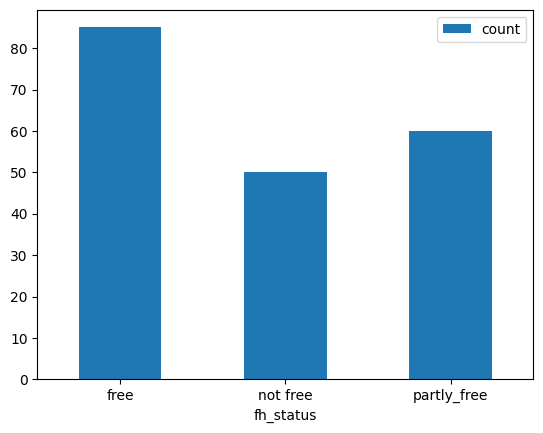

In [94]:
%matplotlib inline
count_df = df.groupby('fh_status').country.agg(count='count').reset_index()
count_df.plot.bar(x='fh_status', y='count', rot=0)